<a href="https://www.kaggle.com/code/emad3li/notebook8b5a61c119?scriptVersionId=163059275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# Load the training data
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

# Display the first few rows of the training data
print(train_data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [3]:
# Check for missing values
print(train_data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [4]:
# Explore the distributions of numerical features
print(train_data.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [5]:
# Handling missing values
# Impute missing numerical values with median
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())

# Impute missing categorical values with mode
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])

# Verify if there are still any missing values
print(train_data.isnull().sum())


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64


/tmp/ipykernel_18/1695090760.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])


In [6]:
# Drop the 'Name' column
train_data.drop(columns=['Name'], inplace=True)

# Verify if the 'Name' column is dropped
print(train_data.head())

# Now, let's proceed with encoding categorical variables


  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0          0.0        0.0           0.0     0.0     0.0        False  
1        109.0        9.0          25.0   549.0    44.0         True  
2         43.0     3576.0           0.0  6715.0    49.0        False  
3          0.0     1283.0         371.0  3329.0   193.0        False  
4        303.0       70.0         151.0   565.0     2.0         True  


In [7]:
# Encoding categorical variables using one-hot encoding
encoded_train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data
print(encoded_train_data.head())


  PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     0001_01  39.0          0.0        0.0           0.0     0.0     0.0   
1     0002_01  24.0        109.0        9.0          25.0   549.0    44.0   
2     0003_01  58.0         43.0     3576.0           0.0  6715.0    49.0   
3     0003_02  33.0          0.0     1283.0         371.0  3329.0   193.0   
4     0004_01  16.0        303.0       70.0         151.0   565.0     2.0   

   Transported  HomePlanet_Europa  HomePlanet_Mars  ...  Cabin_G/999/P  \
0        False               True            False  ...          False   
1         True              False            False  ...          False   
2        False               True            False  ...          False   
3        False               True            False  ...          False   
4         True              False            False  ...          False   

   Cabin_G/999/S  Cabin_T/0/P  Cabin_T/1/P  Cabin_T/2/P  Cabin_T/2/S  \
0          False    

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns for scaling (excluding 'Transported')
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Apply standardization to numerical columns
encoded_train_data[numerical_cols] = scaler.fit_transform(encoded_train_data[numerical_cols])

# Display the first few rows of the scaled data
print(encoded_train_data.head())


  PassengerId       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0     0001_01  0.711945    -0.333105  -0.281027     -0.283579 -0.270626   
1     0002_01 -0.334037    -0.168073  -0.275387     -0.241771  0.217158   
2     0003_01  2.036857    -0.268001   1.959998     -0.283579  5.695623   
3     0003_02  0.293552    -0.333105   0.523010      0.336851  2.687176   
4     0004_01 -0.891895     0.125652  -0.237159     -0.031059  0.231374   

     VRDeck  Transported  HomePlanet_Europa  HomePlanet_Mars  ...  \
0 -0.263003        False               True            False  ...   
1 -0.224205         True              False            False  ...   
2 -0.219796        False               True            False  ...   
3 -0.092818        False               True            False  ...   
4 -0.261240         True              False            False  ...   

   Cabin_G/999/P  Cabin_G/999/S  Cabin_T/0/P  Cabin_T/1/P  Cabin_T/2/P  \
0          False          False        False        False   

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = encoded_train_data.drop(columns=['PassengerId', 'Transported'])
y = encoded_train_data['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7763082231167338


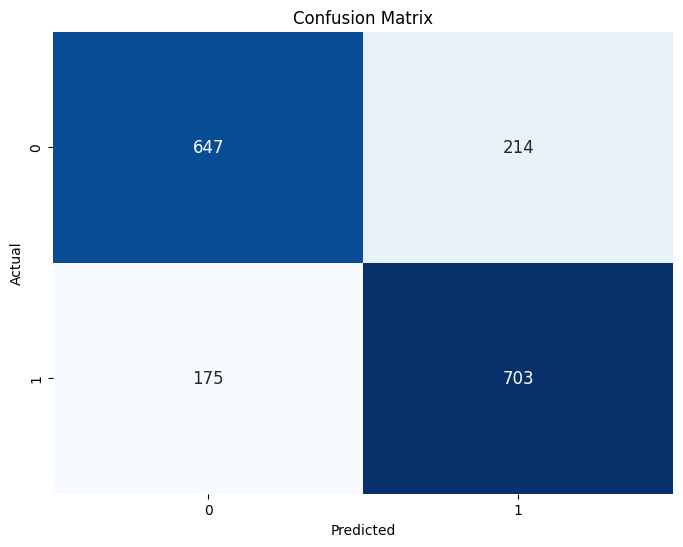

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [11]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print(report)


              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.80      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



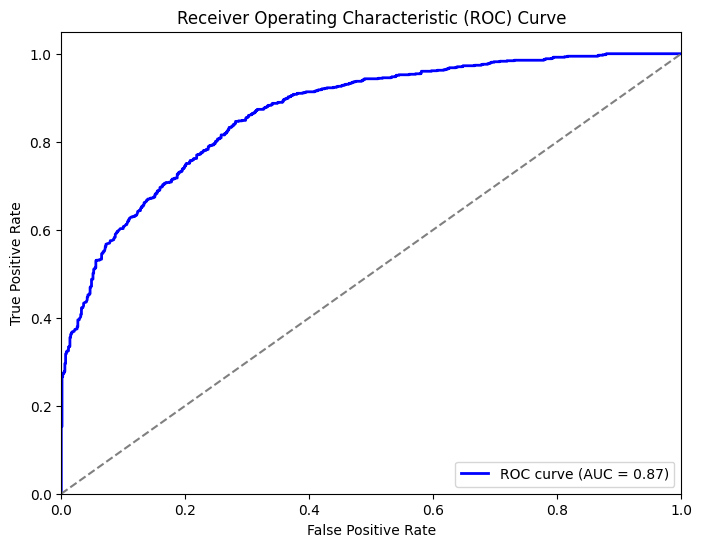

AUC Score: 0.8669191939234719


In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", roc_auc)


In [13]:
# Get the feature names
feature_names = X.columns

# Get the model coefficients
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 10 features with the highest absolute coefficients
print(coefficients_df.head(10))


                Feature  Coefficient  Absolute Coefficient
4                   Spa    -2.174688              2.174688
6     HomePlanet_Europa     2.117077              2.117077
5                VRDeck    -2.011607              2.011607
6535      Cabin_G/981/S     1.653398              1.653398
992        Cabin_C/65/S     1.428629              1.428629
8        CryoSleep_True     1.344617              1.344617
4609     Cabin_G/1026/P    -1.272349              1.272349
736       Cabin_C/187/S     1.262028              1.262028
5922      Cabin_G/570/S    -1.259018              1.259018
6524      Cabin_G/974/P    -1.255356              1.255356


In [14]:
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.7826337  0.7826337  0.7786084  0.78250863 0.79401611]
Mean CV Accuracy: 0.7840801063532009
